In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv("/kaggle/input/titanic/train.csv")
test = pd.read_csv("/kaggle/input/titanic/test.csv")

print(train.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


**We'll remove the PassengerId column since it's useless and we'll also remove the Name column and the Ticket column**

In [3]:
train = train.drop(["PassengerId", "Ticket", "Name"], axis=1)
test = test.drop(["PassengerId", "Ticket", "Name"], axis=1)

print(train.head())
print(test.head())

   Survived  Pclass     Sex   Age  SibSp  Parch     Fare Cabin Embarked
0         0       3    male  22.0      1      0   7.2500   NaN        S
1         1       1  female  38.0      1      0  71.2833   C85        C
2         1       3  female  26.0      0      0   7.9250   NaN        S
3         1       1  female  35.0      1      0  53.1000  C123        S
4         0       3    male  35.0      0      0   8.0500   NaN        S
   Pclass     Sex   Age  SibSp  Parch     Fare Cabin Embarked
0       3    male  34.5      0      0   7.8292   NaN        Q
1       3  female  47.0      1      0   7.0000   NaN        S
2       2    male  62.0      0      0   9.6875   NaN        Q
3       3    male  27.0      0      0   8.6625   NaN        S
4       3  female  22.0      1      1  12.2875   NaN        S


**Looking Nice, Let's Start with the descriptive statistics and then we follow with the EDA**

# Descriptive Statistics

In [4]:
# we'll look at the training set

print(train.describe())
print(train.isna().sum())

# we'll look at the testing set

print(test.describe())
print(test.isna().sum())

         Survived      Pclass         Age       SibSp       Parch        Fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200
Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64
           Pclass         Age       SibSp       Parch        Fare
count  418.000000  332.000000  418.000000  418.000000  417.000000
mean     

**It's clear that the Cabin column in both the training and testing set is mostly made of Nan values, so it's nearly pointless to keep that column(if we wish to drop Nan values in that column we'll drop a large portion of the rows, and replacing the Nan values won't be an efficient strategy since they are many, It's almost like creating new Data!)**

In [5]:
train = train.drop(["Cabin"], axis=1)
test = test.drop(["Cabin"], axis=1)

print(train.head())
print(test.head())

##################################################

print(train.isna().sum())
print(test.isna().sum())

   Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0         0       3    male  22.0      1      0   7.2500        S
1         1       1  female  38.0      1      0  71.2833        C
2         1       3  female  26.0      0      0   7.9250        S
3         1       1  female  35.0      1      0  53.1000        S
4         0       3    male  35.0      0      0   8.0500        S
   Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0       3    male  34.5      0      0   7.8292        Q
1       3  female  47.0      1      0   7.0000        S
2       2    male  62.0      0      0   9.6875        Q
3       3    male  27.0      0      0   8.6625        S
4       3  female  22.0      1      1  12.2875        S
Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64
Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64


**We can see that there are only 2 Nan rows in Embarked which is a very slight amount compared to 891 rows of the training set, so removing these rows won't be a problem, The only thing to consider here is the Age column in bith the training and testing sets, Later on we'll see how we handle those missing values**

In [6]:
train = train.dropna(subset=["Embarked"])

# Exploratory Data Analysis

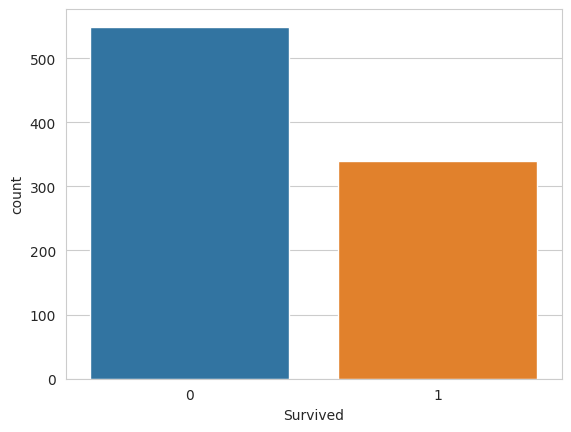

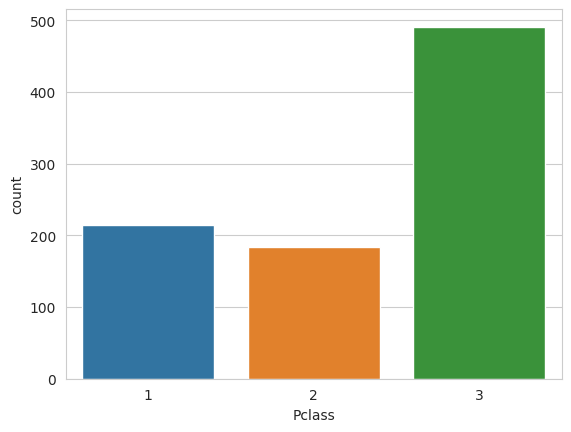

In [7]:
# set plot style
sns.set_style("whitegrid")

# Plots

sns.countplot(data=train, x="Survived")
plt.show()

sns.countplot(data=train, x="Pclass")
plt.show()

**As expected, the survivors were less than the deceased, and the 3 class is greater in number followed by first then second**

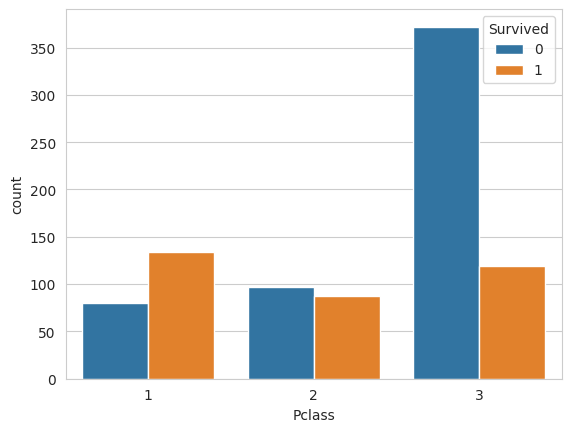

In [8]:
sns.countplot(data=train, x="Pclass", hue="Survived")
plt.show()

# **Now that's an Interesting one!**

**It's obvious from this plot that there was clearly a Bias based on socio-economic class**

**so 1st class had more survivors than dead people.**

**2nd class has more dead than surviving eventhough the numbers are pretty close so it's safe to say that almost half of 2nd class survived.**

**But when it came to 3rd class, the Dead greatly outnumber the survivors**

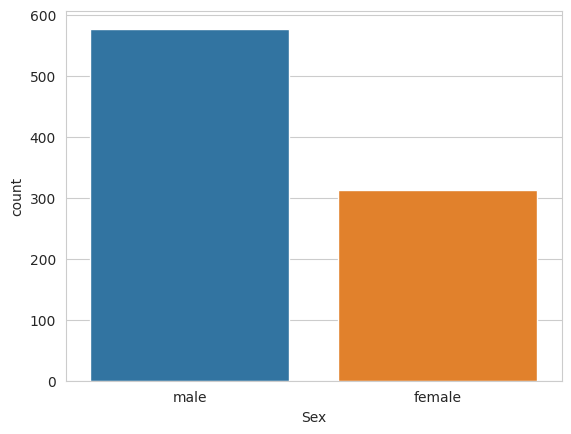

In [9]:
sns.countplot(data=train, x="Sex")
plt.show()

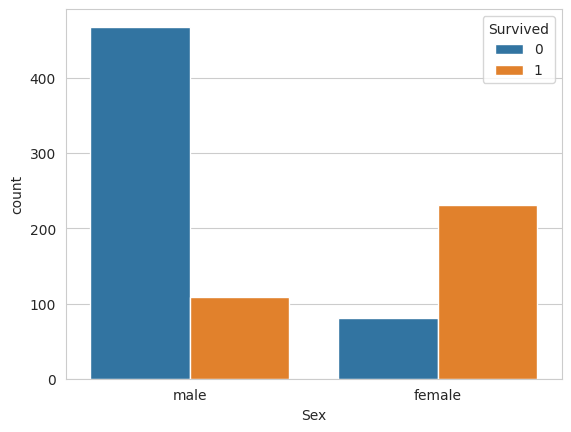

In [10]:
sns.countplot(data=train, x="Sex", hue="Survived")
plt.show()

# **Another Bias!**
**Most females Survived**

**Most males Died**

**So It's clear that Sex and Socio-economic Class are very strong factors on determining the probability of survival!**

**As we remember, the Age column had a lot of missing values, nearly 20% of its values were missing!, so dropping the rows with missing values is very likely to negatively impact the performance of the model, so we'll need to replace these values!**

In [11]:
print(test[test["Fare"].isna()])

     Pclass   Sex   Age  SibSp  Parch  Fare Embarked
152       3  male  60.5      0      0   NaN        S


**If we know that this guy had a third class ticket, we could easily fill the fare value with the mean of the Fare of third class passengers!**

In [12]:
test.iloc[152, 5] = np.mean(test[test["Pclass"]==3]["Fare"])

print(test.iloc[152, :])

Pclass              3
Sex              male
Age              60.5
SibSp               0
Parch               0
Fare        12.459678
Embarked            S
Name: 152, dtype: object


In [13]:
print(train.isna().sum())
print(test.isna().sum())

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      0
dtype: int64
Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         0
Embarked     0
dtype: int64


**Nice!, the only thing left to handle is the Age column**

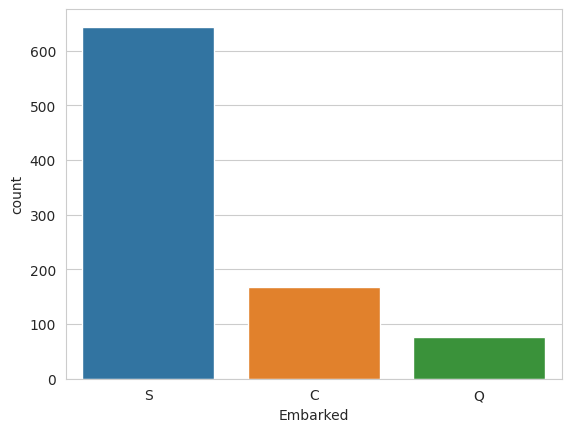

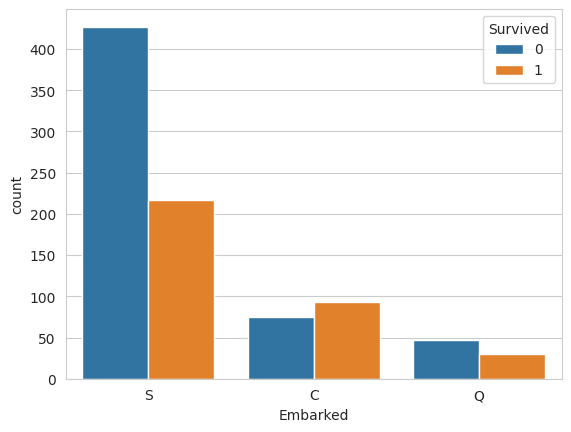

In [14]:
sns.countplot(data=train, x="Embarked")
plt.show()

sns.countplot(data=train, x="Embarked", hue="Survived")
plt.show()

**The luckiest value is C apparently**

# **Replacing the missing values in Age column**

**Replacing the missing values with the mean or the median is a very NAIVE approach!**

**So how about we use a Regression Machine Learning Model to accomplish this task?**

**More sensible in my opinion**

In [15]:
from sklearn.ensemble import RandomForestRegressor

# before using the model we'll have to convert Sex column to binary values as well as hot encode the embarked column!

train["Sex"] = [1 if i=="male" else 0 for i in train["Sex"]]
test["Sex"] = [1 if i=="male" else 0 for i in test["Sex"]]

train = pd.get_dummies(train)
test = pd.get_dummies(test)

print(train.head())
print(test.head())


# Define a function to fill missing values in the 'Age' column

def fill_missing_ages(df):

    X = df.drop(['Age'], axis=1)
    y = df['Age']

    X_missing = X[y.isna()]
    y_missing = y[y.isna()]
    
    X_not_missing = X[~y.isna()]
    y_not_missing = y[~y.isna()]

    # Train a regression model on the non-missing data

    model = RandomForestRegressor(n_estimators=100, random_state=42)

    model.fit(X_not_missing, y_not_missing)

    # Predict the missing ages

    predictions = model.predict(X_missing)

    # Fill the missing ages with the predictions

    df.loc[y.isna(), 'Age'] = predictions

    return df


# Fill missing values in the 'Age' column

train = fill_missing_ages(train)
test = fill_missing_ages(test)    

# we'll see if there are any Nan values left in train, test sets

print(train.isna().sum())
print(test.isna().sum())

   Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked_C  Embarked_Q  \
0         0       3    1  22.0      1      0   7.2500       False       False   
1         1       1    0  38.0      1      0  71.2833        True       False   
2         1       3    0  26.0      0      0   7.9250       False       False   
3         1       1    0  35.0      1      0  53.1000       False       False   
4         0       3    1  35.0      0      0   8.0500       False       False   

   Embarked_S  
0        True  
1       False  
2        True  
3        True  
4        True  
   Pclass  Sex   Age  SibSp  Parch     Fare  Embarked_C  Embarked_Q  \
0       3    1  34.5      0      0   7.8292       False        True   
1       3    0  47.0      1      0   7.0000       False       False   
2       2    1  62.0      0      0   9.6875       False        True   
3       3    1  27.0      0      0   8.6625       False       False   
4       3    0  22.0      1      1  12.2875       False       

**Missing values in the Age column have been replaced successfully!, now we continue with our Visualizations**

# **An Important Note**

**I could have easily converted the Pclass column into a categorical column then turn it into a dummy column like the Embarked column, But I preferred to keep it as a numerical one due to the ORDINAL nature of this column!**

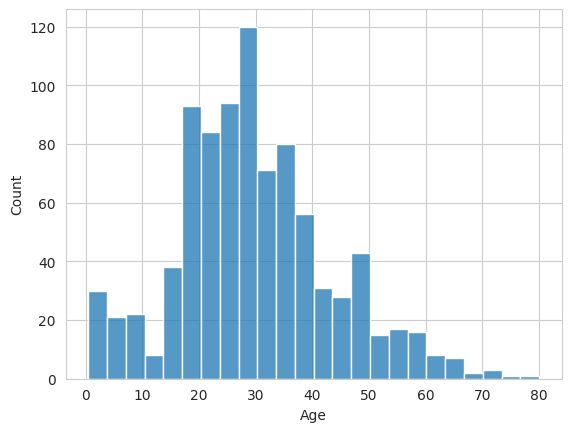

In [16]:
import warnings
warnings.filterwarnings("ignore", message="use_inf_as_na option is deprecated")

sns.histplot(data=train, x="Age")
plt.show()

**We could say that the most common Ages were from 20 to 40**

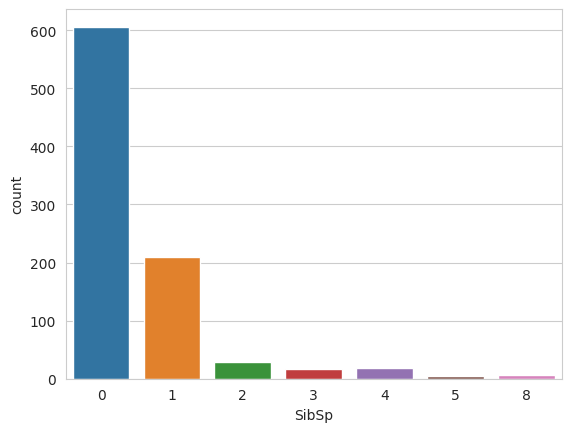

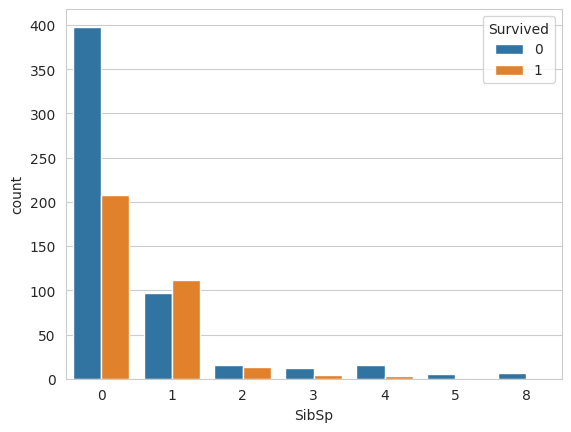

In [17]:
sns.countplot(data=train, x="SibSp")
plt.show()

sns.countplot(data=train, x="SibSp", hue="Survived")
plt.show()

**It seems that having one Sibling or Spouse yielded a higher chance of survival than death!, although the probabilities are relatively close, with 2 SibSp it's nearly 50 50, so was it the case that couples had a higher chance of survival?**

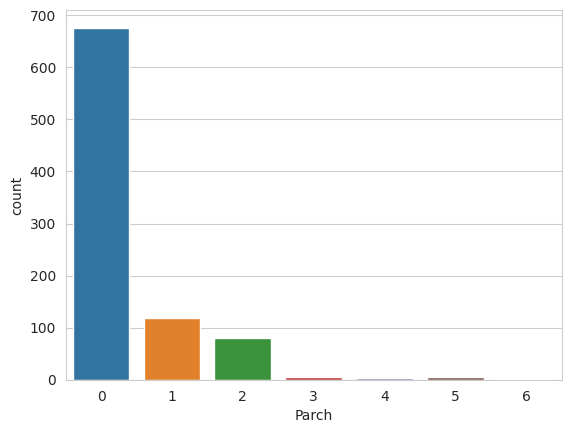

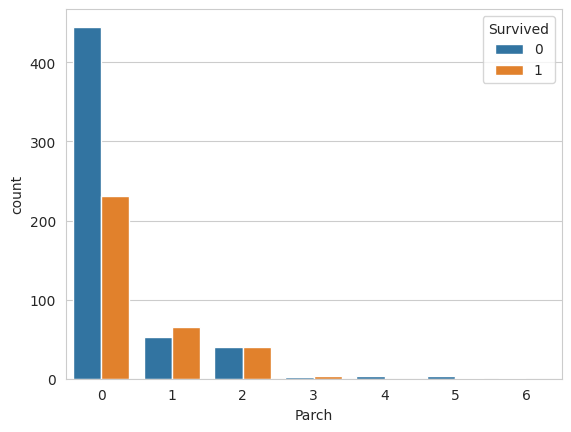

In [18]:
sns.countplot(data=train, x="Parch")
plt.show()

sns.countplot(data=train, x="Parch", hue="Survived")
plt.show()

**Having one Parent or Child yielded a higher chance of survival, while having 2 has a 50 50 probability!**

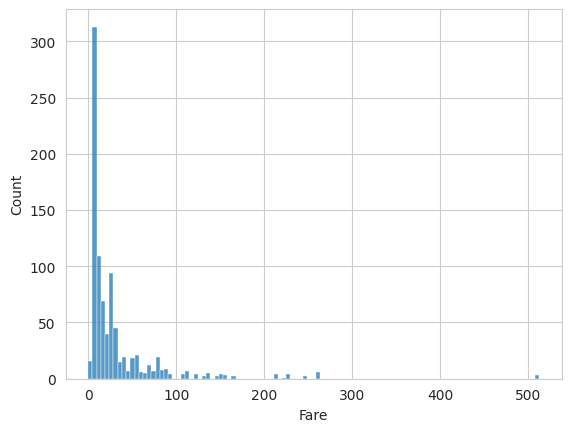

In [19]:
import warnings
warnings.filterwarnings("ignore", message="use_inf_as_na option is deprecated")

sns.histplot(data=train, x="Fare")
plt.show()

**Nothing odd here, lower Fares are extremely common since most of those on the Titanic were 3rd class followed by 2nd class, those with 500+ Fares likely had the fanciest suites on the Titanic!**

**I would like to investigate the survival probability of those who had a fare of over 500**

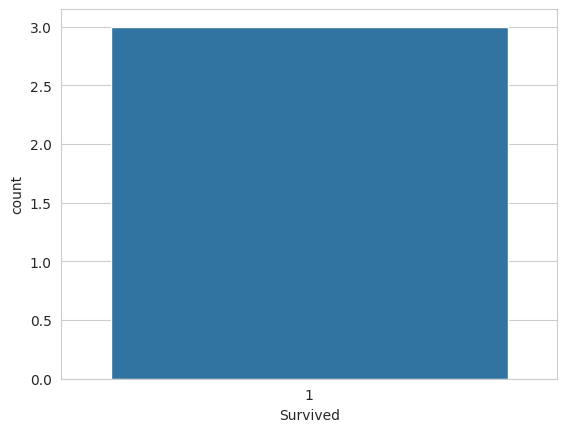

In [20]:
here_comes_the_money = train[train["Fare"]>=500]

sns.countplot(data=here_comes_the_money, x="Survived")
plt.show()

# Money Talks!

**Three had a fare of over 500, three survived**

**How about we see those who had a fare of over 200?**

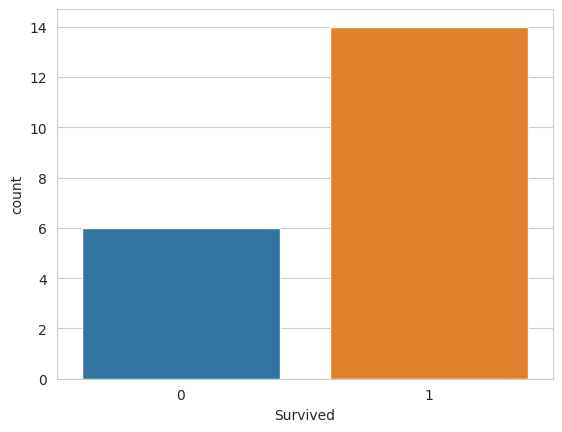

In [21]:
over_200 = train[train["Fare"]>=200]

sns.countplot(data=over_200, x="Survived")
plt.show()

**14 out of 20 survived!**

**That's a 70% survival rate if you paid a Fare of over 200!**

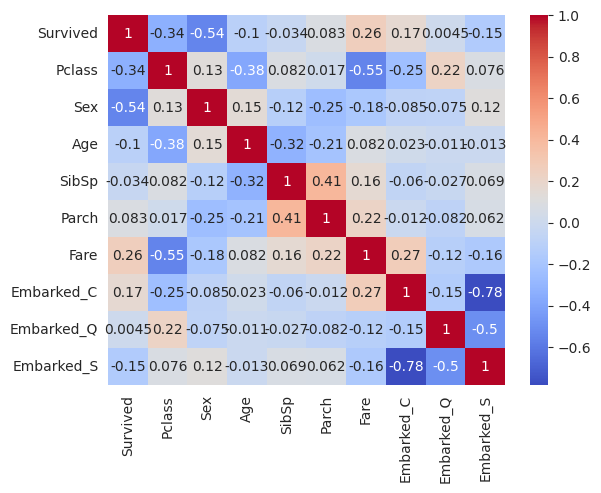

In [22]:
# Compute the correlation matrix

corr_matrix = train.corr()

# Create the heatmap

sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)

# Display the heatmap

plt.show()

# **Drop Pclass?**

**As expected, there is a decent negative correlation between Fare and Pclass, since 1 which is a smaller number than 3 indicates first class which pays higher Fare than third class, you could easily tell a Passenger's class by looking at the Fare he/she paid!, We may consider dropping the Pclass column and see how it affects the model performance!**

# **And Now We Start The Machine Learning!**

In [23]:
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import accuracy_score, confusion_matrix

**Now I'll test the performance of three models with and without dropping the Pclass column!**

In [24]:
actual = pd.read_csv("/kaggle/input/titanic/gender_submission.csv")
actual = actual.drop("PassengerId", axis=1)


X_train = train.drop("Survived",axis=1)
X_test = test
y_train = train["Survived"]
y_test = actual


# Initialize XGBoost classifier
xgb_model = xgb.XGBClassifier(random_state=42)


# Train the model
xgb_model.fit(X_train, y_train)


# Make predictions
y_pred = xgb_model.predict(X_test)


# Evaluate the model before dropping
accuracy_before_dropping_xgb = accuracy_score(y_test, y_pred)

print(f"Accuracy before dropping for XGBoost: {accuracy_before_dropping_xgb}")

################################################################################

# Initialize Decision Tree classifier
dt_model = DecisionTreeClassifier(random_state=42)


# Train the model
dt_model.fit(X_train, y_train)


# Make predictions
y_pred = dt_model.predict(X_test)


# Evaluate the model before dropping
accuracy_before_dropping_dt = accuracy_score(y_test, y_pred)


print(f"Accuracy before dropping for Decision Tree: {accuracy_before_dropping_dt}")

################################################################################

# Initialize Logistic Regression classifier
lr_model = LogisticRegression(random_state=42, max_iter=2000)


# Train the model
lr_model.fit(X_train, y_train)


# Make predictions
y_pred = lr_model.predict(X_test)


# Evaluate the model before dropping
accuracy_before_dropping_lr = accuracy_score(y_test, y_pred)


print(f"Accuracy before dropping for Logistic Regression: {accuracy_before_dropping_lr}")


################################################################################
################################################################################
################################################################################
################################################################################


actual = pd.read_csv("/kaggle/input/titanic/gender_submission.csv")
actual = actual.drop("PassengerId", axis=1)


X_train = train.drop(["Survived", "Pclass"],axis=1)
X_test = test.drop("Pclass", axis=1)
y_train = train["Survived"]
y_test = actual

# Initialize XGBoost classifier
xgb_model = xgb.XGBClassifier(random_state=42)


# Train the model
xgb_model.fit(X_train, y_train)


# Make predictions
y_pred = xgb_model.predict(X_test)


# Evaluate the model before dropping
accuracy_after_dropping_xgb = accuracy_score(y_test, y_pred)

print(f"Accuracy after dropping for XGBoost: {accuracy_after_dropping_xgb}")

################################################################################

# Initialize Decision Tree classifier
dt_model = DecisionTreeClassifier(random_state=42)


# Train the model
dt_model.fit(X_train, y_train)


# Make predictions
y_pred = dt_model.predict(X_test)


# Evaluate the model before dropping
accuracy_after_dropping_dt = accuracy_score(y_test, y_pred)


print(f"Accuracy after dropping for Decision Tree: {accuracy_after_dropping_dt}")

################################################################################

# Initialize Logistic Regression classifier
lr_model = LogisticRegression(random_state=42, max_iter=2000)


# Train the model
lr_model.fit(X_train, y_train)


# Make predictions
y_pred = lr_model.predict(X_test)


# Evaluate the model before dropping
accuracy_after_dropping_lr = accuracy_score(y_test, y_pred)


print(f"Accuracy after dropping for Logistic Regression: {accuracy_after_dropping_lr}")

Accuracy before dropping for XGBoost: 0.7822966507177034
Accuracy before dropping for Decision Tree: 0.715311004784689
Accuracy before dropping for Logistic Regression: 0.9210526315789473
Accuracy after dropping for XGBoost: 0.7966507177033493
Accuracy after dropping for Decision Tree: 0.7344497607655502
Accuracy after dropping for Logistic Regression: 0.9665071770334929


**So It seems that dropping the Pclass column enhances the performance, so from now and on we'll continue our work with this column dropped!**

# **Pclass column will be dropped below!**

In [25]:
actual = pd.read_csv("/kaggle/input/titanic/gender_submission.csv")
actual = actual.drop("PassengerId", axis=1)


X_train = train.drop(["Survived", "Pclass"],axis=1)
X_test = test.drop("Pclass", axis=1)
y_train = train["Survived"]
y_test = actual

# **XGBoost Classifier**

Accuracy before optimization for XGBoost: 0.7966507177033493


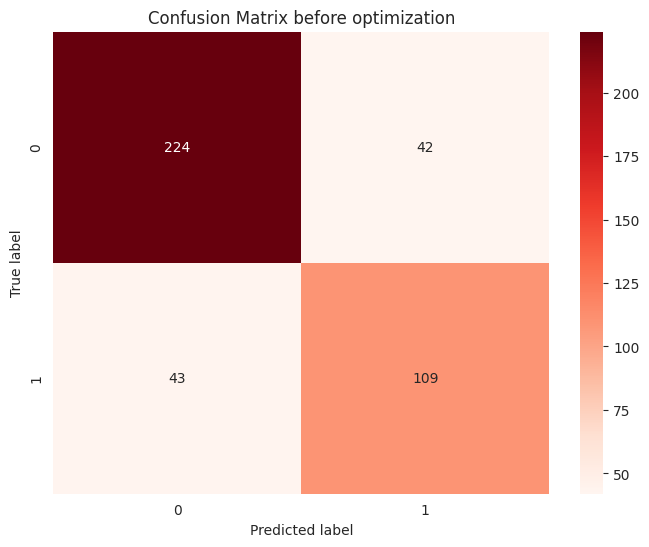

Accuracy after optimization for XGBoost: 0.8779904306220095


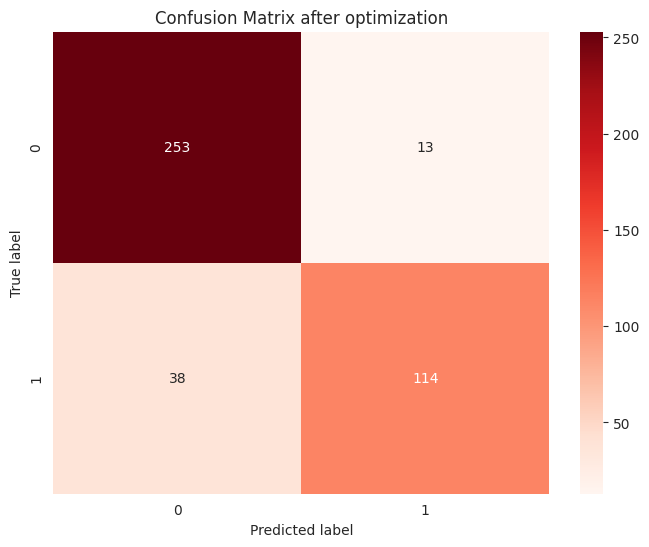

In [26]:
# Initialize XGBoost classifier

xgb_model = xgb.XGBClassifier(random_state=42)


# Train the model

xgb_model.fit(X_train, y_train)


# Make predictions

y_pred = xgb_model.predict(X_test)


# Evaluate the model before optimization

accuracy_before_optimization_xgb = accuracy_score(y_test, y_pred)


print(f"Accuracy before optimization for XGBoost: {accuracy_before_optimization_xgb}")


# Create confusion matrix

cm_before_optimization = confusion_matrix(y_test, y_pred)


# Plot confusion matrix

plt.figure(figsize=(8, 6))

sns.heatmap(cm_before_optimization, annot=True, fmt='d', cmap='Reds')

plt.xlabel('Predicted label')

plt.ylabel('True label')

plt.title('Confusion Matrix before optimization')

plt.show()


# Define hyperparameter space for random search

param_grid = {

    'max_depth': [3, 5, 7, 9],

    'learning_rate': [0.01, 0.1, 0.5, 1],

    'n_estimators': [50, 100, 200, 500],

    'gamma': [0, 0.1, 0.5, 1],

    'subsample': [0.5, 0.8, 1],

    'colsample_bytree': [0.5, 0.8, 1],

    'reg_alpha': [0, 0.1, 0.5, 1],

    'reg_lambda': [0, 0.1, 0.5, 1]

}


# Perform random search for hyperparameter optimization

random_search = RandomizedSearchCV(xgb_model, param_grid, cv=5, scoring='accuracy', n_iter=10, random_state=42)

random_search.fit(X_train, y_train)


# Get the best hyperparameters and the corresponding model

best_params = random_search.best_params_

best_model_xgb = random_search.best_estimator_


# Make predictions with the optimized model

y_pred_optimized = best_model_xgb.predict(X_test)


# Evaluate the model after optimization

accuracy_after_optimization_xgb = accuracy_score(y_test, y_pred_optimized)


print(f"Accuracy after optimization for XGBoost: {accuracy_after_optimization_xgb}")


# Create confusion matrix

cm_after_optimization = confusion_matrix(y_test, y_pred_optimized)


# Plot confusion matrix

plt.figure(figsize=(8, 6))

sns.heatmap(cm_after_optimization, annot=True, fmt='d', cmap='Reds')

plt.xlabel('Predicted label')

plt.ylabel('True label')

plt.title('Confusion Matrix after optimization')

plt.show()

# **Random Forest Classifier**

Accuracy before optimization for Random Forest: 0.7966507177033493


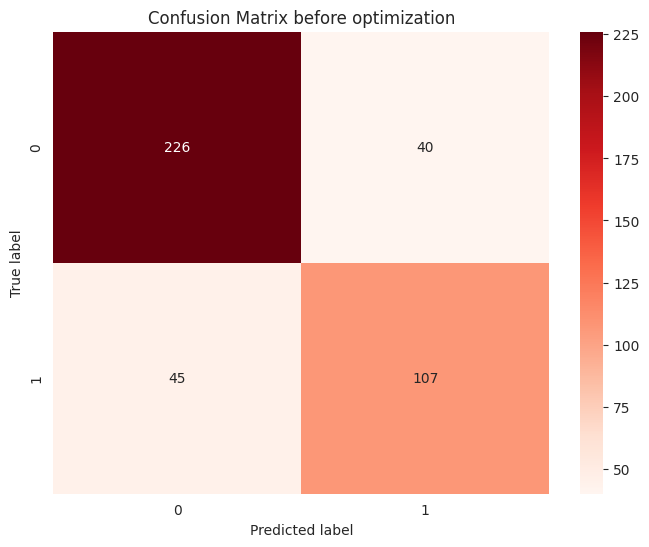

Accuracy after optimization for Random Forest: 0.8899521531100478


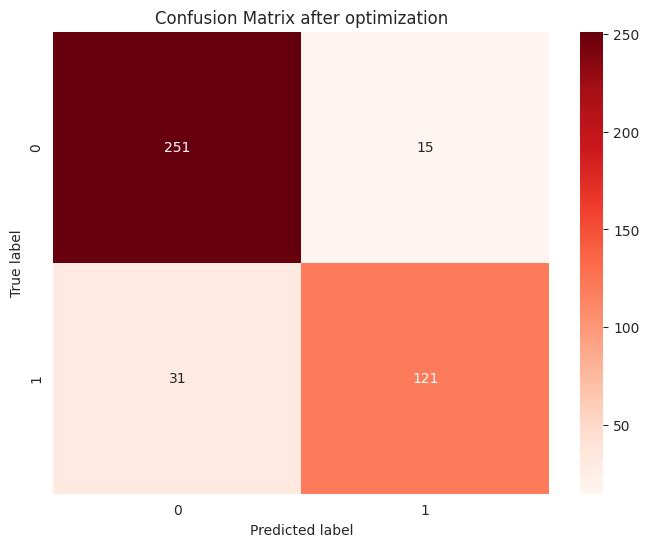

In [27]:
# Initialize Random Forest classifier

rf_model = RandomForestClassifier(random_state=42)


# Train the model

rf_model.fit(X_train, y_train)


# Make predictions

y_pred = rf_model.predict(X_test)


# Evaluate the model before optimization

accuracy_before_optimization_rf = accuracy_score(y_test, y_pred)


print(f"Accuracy before optimization for Random Forest: {accuracy_before_optimization_rf}")


# Create confusion matrix

cm_before_optimization = confusion_matrix(y_test, y_pred)


# Plot confusion matrix

plt.figure(figsize=(8, 6))

sns.heatmap(cm_before_optimization, annot=True, fmt='d', cmap='Reds')

plt.xlabel('Predicted label')

plt.ylabel('True label')

plt.title('Confusion Matrix before optimization')

plt.show()


# Define hyperparameter space for random search

param_grid = {

    'n_estimators': [50, 100, 200, 500],

    'max_depth': [3, 5, 7, 9],

    'min_samples_split': [2, 5, 10],

    'min_samples_leaf': [1, 5, 10]

}


# Perform random search for hyperparameter optimization

random_search = RandomizedSearchCV(rf_model, param_grid, cv=5, scoring='accuracy', n_iter=10, random_state=42)

random_search.fit(X_train, y_train)


# Get the best hyperparameters and the corresponding model

best_params = random_search.best_params_

best_model_rf = random_search.best_estimator_


# Make predictions with the optimized model

y_pred_optimized = best_model_rf.predict(X_test)


# Evaluate the model after optimization

accuracy_after_optimization_rf = accuracy_score(y_test, y_pred_optimized)


print(f"Accuracy after optimization for Random Forest: {accuracy_after_optimization_rf}")


# Create confusion matrix

cm_after_optimization = confusion_matrix(y_test, y_pred_optimized)


# Plot confusion matrix

plt.figure(figsize=(8, 6))

sns.heatmap(cm_after_optimization, annot=True, fmt='d', cmap='Reds')

plt.xlabel('Predicted label')

plt.ylabel('True label')

plt.title('Confusion Matrix after optimization')

plt.show()

# **KNN Classifier**

Accuracy before optimization for KNN: 0.6411483253588517


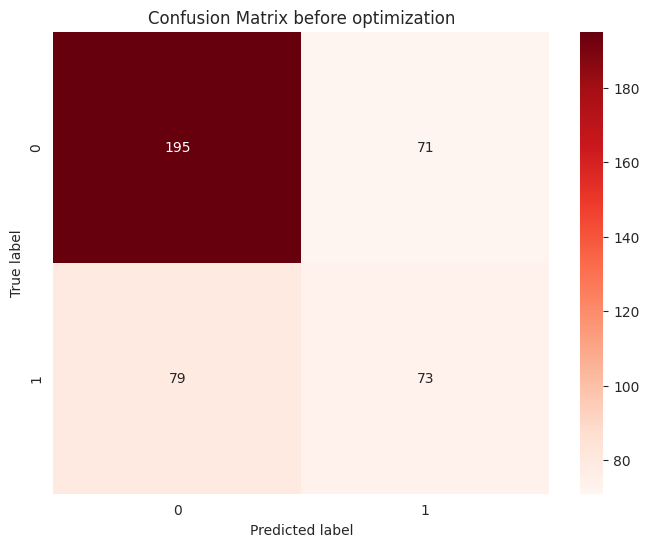

Accuracy after optimization for KNN: 0.6148325358851675


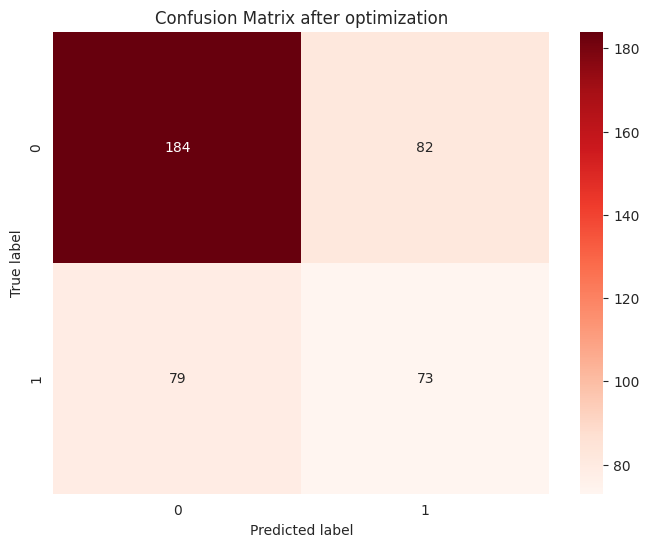

In [28]:
# Initialize KNN classifier

knn_model = KNeighborsClassifier()


# Train the model

knn_model.fit(X_train, y_train)


# Make predictions

y_pred = knn_model.predict(X_test)


# Evaluate the model before optimization

accuracy_before_optimization_knn = accuracy_score(y_test, y_pred)


print(f"Accuracy before optimization for KNN: {accuracy_before_optimization_knn}")


# Create confusion matrix

cm_before_optimization = confusion_matrix(y_test, y_pred)


# Plot confusion matrix

plt.figure(figsize=(8, 6))

sns.heatmap(cm_before_optimization, annot=True, fmt='d', cmap='Reds')

plt.xlabel('Predicted label')

plt.ylabel('True label')

plt.title('Confusion Matrix before optimization')

plt.show()


# Define hyperparameter space for random search

param_grid = {

    'n_neighbors': [3, 5, 7, 9, 11, 13, 15],

    'weights': ['uniform', 'distance'],

    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],

    'leaf_size': [10, 20, 30, 40, 50]

}


# Perform random search for hyperparameter optimization

random_search = RandomizedSearchCV(knn_model, param_grid, cv=5, scoring='accuracy', n_iter=10, random_state=42)

random_search.fit(X_train, y_train)


# Get the best hyperparameters and the corresponding model

best_params = random_search.best_params_

best_model_knn = random_search.best_estimator_


# Make predictions with the optimized model

y_pred_optimized = best_model_knn.predict(X_test)


# Evaluate the model after optimization

accuracy_after_optimization_knn = accuracy_score(y_test, y_pred_optimized)


print(f"Accuracy after optimization for KNN: {accuracy_after_optimization_knn}")


# Create confusion matrix

cm_after_optimization = confusion_matrix(y_test, y_pred_optimized)


# Plot confusion matrix

plt.figure(figsize=(8, 6))

sns.heatmap(cm_after_optimization, annot=True, fmt='d', cmap='Reds')

plt.xlabel('Predicted label')

plt.ylabel('True label')

plt.title('Confusion Matrix after optimization')

plt.show()

# **Decision Tree Classifier**

Accuracy before optimization for Decision Tree: 0.7344497607655502


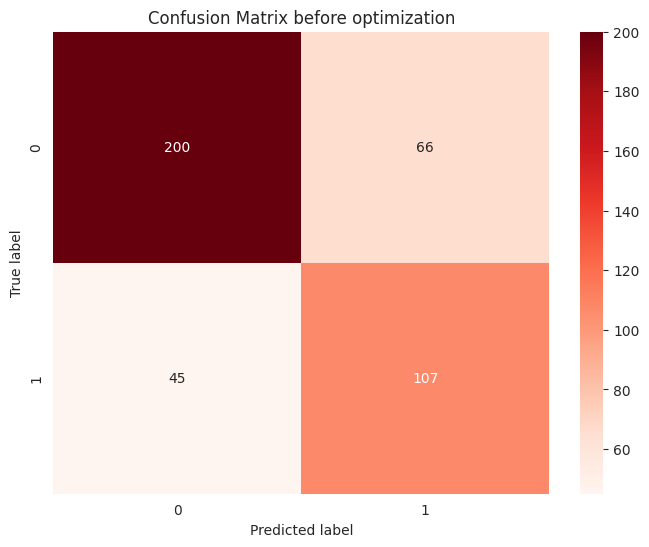

Accuracy after optimization for Decision Tree: 0.9688995215311005


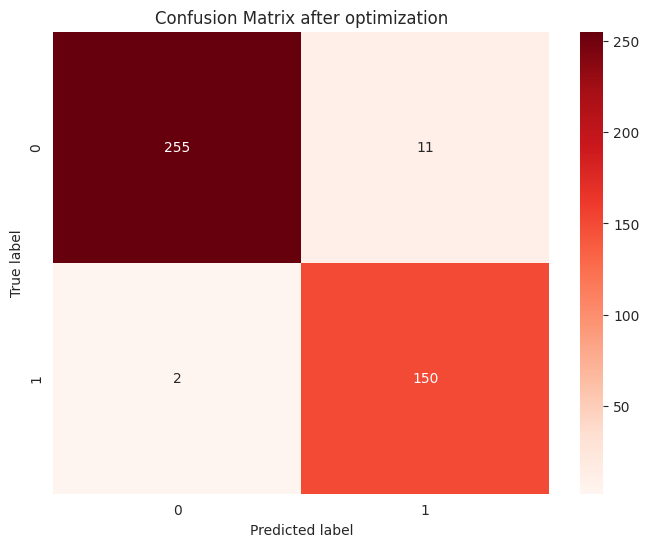

In [29]:
# Initialize Decision Tree classifier

dt_model = DecisionTreeClassifier(random_state=42)


# Train the model

dt_model.fit(X_train, y_train)


# Make predictions

y_pred = dt_model.predict(X_test)


# Evaluate the model before optimization

accuracy_before_optimization_dt = accuracy_score(y_test, y_pred)


print(f"Accuracy before optimization for Decision Tree: {accuracy_before_optimization_dt}")


# Create confusion matrix

cm_before_optimization = confusion_matrix(y_test, y_pred)


# Plot confusion matrix

plt.figure(figsize=(8, 6))

sns.heatmap(cm_before_optimization, annot=True, fmt='d', cmap='Reds')

plt.xlabel('Predicted label')

plt.ylabel('True label')

plt.title('Confusion Matrix before optimization')

plt.show()


# Define hyperparameter space for random search

param_grid = {

    'max_depth': [3, 5, 7, 9],

    'min_samples_split': [2, 5, 10],

    'min_samples_leaf': [1, 5, 10],

    'criterion': ['gini', 'entropy']

}


# Perform random search for hyperparameter optimization

random_search = RandomizedSearchCV(dt_model, param_grid, cv=5, scoring='accuracy', n_iter=10, random_state=42)

random_search.fit(X_train, y_train)


# Get the best hyperparameters and the corresponding model

best_params = random_search.best_params_

best_model_dt = random_search.best_estimator_


# Make predictions with the optimized model

y_pred_optimized = best_model_dt.predict(X_test)


# Evaluate the model after optimization

accuracy_after_optimization_dt = accuracy_score(y_test, y_pred_optimized)


print(f"Accuracy after optimization for Decision Tree: {accuracy_after_optimization_dt}")


# Create confusion matrix

cm_after_optimization = confusion_matrix(y_test, y_pred_optimized)


# Plot confusion matrix

plt.figure(figsize=(8, 6))

sns.heatmap(cm_after_optimization, annot=True, fmt='d', cmap='Reds')

plt.xlabel('Predicted label')

plt.ylabel('True label')

plt.title('Confusion Matrix after optimization')

plt.show()

# **Logistic Regression Classifier**

Accuracy before optimization for Logistic Regression: 0.9665071770334929


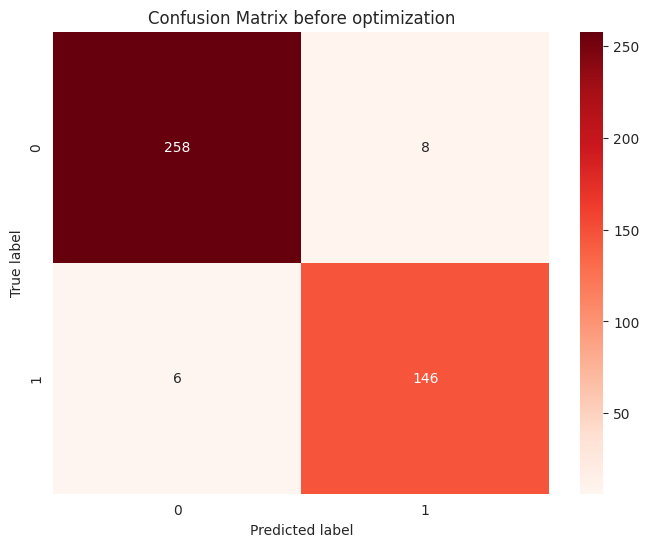

Accuracy after optimization for Logistic Regression: 0.9497607655502392


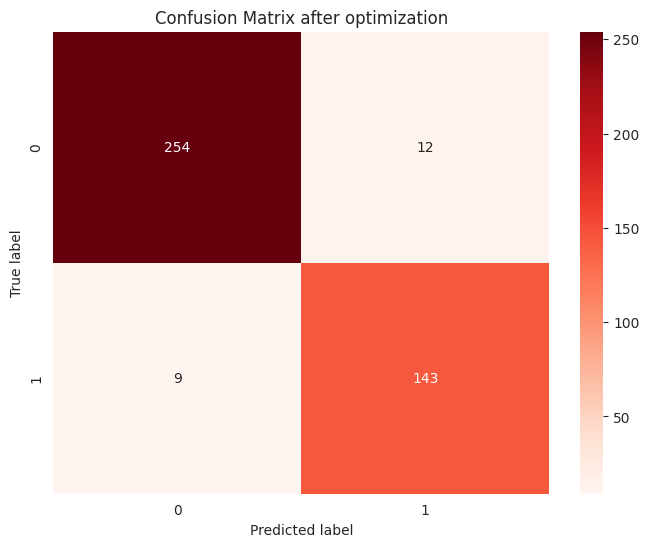

In [30]:
# Initialize Logistic Regression classifier

lr_model = LogisticRegression(max_iter=2000)


# Train the model

lr_model.fit(X_train, y_train)


# Make predictions

y_pred = lr_model.predict(X_test)


# Evaluate the model before optimization

accuracy_before_optimization_lr = accuracy_score(y_test, y_pred)


print(f"Accuracy before optimization for Logistic Regression: {accuracy_before_optimization_lr}")


# Create confusion matrix

cm_before_optimization = confusion_matrix(y_test, y_pred)


# Plot confusion matrix

plt.figure(figsize=(8, 6))

sns.heatmap(cm_before_optimization, annot=True, fmt='d', cmap='Reds')

plt.xlabel('Predicted label')

plt.ylabel('True label')

plt.title('Confusion Matrix before optimization')

plt.show()


# Define hyperparameter space for random search

param_grid = {

    'C': [0.1, 1, 10, 100],

    'solver': ['liblinear', 'newton-cg', 'lbfgs']

}


# Perform random search for hyperparameter optimization

random_search = RandomizedSearchCV(lr_model, param_grid, cv=5, scoring='accuracy', n_iter=10, random_state=42)

random_search.fit(X_train, y_train)


# Get the best hyperparameters and the corresponding model

best_params = random_search.best_params_

best_model_lr = random_search.best_estimator_


# Make predictions with the optimized model

y_pred_optimized = best_model_lr.predict(X_test)


# Evaluate the model after optimization

accuracy_after_optimization_lr = accuracy_score(y_test, y_pred_optimized)


print(f"Accuracy after optimization for Logistic Regression: {accuracy_after_optimization_lr}")


# Create confusion matrix

cm_after_optimization = confusion_matrix(y_test, y_pred_optimized)


# Plot confusion matrix

plt.figure(figsize=(8, 6))

sns.heatmap(cm_after_optimization, annot=True, fmt='d', cmap='Reds')

plt.xlabel('Predicted label')

plt.ylabel('True label')

plt.title('Confusion Matrix after optimization')

plt.show()

# **Cross Validation Accuracy of all Models**

In [31]:
X = pd.concat([X_train, X_test], axis=0)

y = np.concatenate([y_train.values, y_test["Survived"].values])


from sklearn.model_selection import cross_val_score

In [32]:
# Create a list of dictionaries for the models before and after optimization to be plotted later

models = []

# Initialize the XGBoost classifier

clf = xgb.XGBClassifier()

# Perform cross-validation and compute the mean accuracy

mean_cv_score = np.mean(cross_val_score(clf, X, y, cv=5, scoring='accuracy'))

print(f"Mean cross-validation score XGBoost: {mean_cv_score:.3f}")

models.append({"model":"XGBoost", "optimized":False, "score":mean_cv_score})

# Perform cross-validation and compute the mean accuracy

mean_cv_score = np.mean(cross_val_score(best_model_xgb, X, y, cv=5, scoring='accuracy'))

print(f"Mean cross-validation score XGBoost Optimized: {mean_cv_score:.3f}")

models.append({"model":"XGBoost", "optimized":True, "score":mean_cv_score})

##########################################################################################

# Initialize the random forest classifier

clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Perform cross-validation and compute the mean accuracy

mean_cv_score = np.mean(cross_val_score(clf, X, y, cv=5, scoring='accuracy'))

print(f"Mean cross-validation score Random Forest: {mean_cv_score:.3f}")

models.append({"model":"Random Forest", "optimized":False, "score":mean_cv_score})

# Perform cross-validation and compute the mean accuracy

mean_cv_score = np.mean(cross_val_score(best_model_rf, X, y, cv=5, scoring='accuracy'))

print(f"Mean cross-validation score Random Forest Optimized: {mean_cv_score:.3f}")

models.append({"model":"Random Forest", "optimized":True, "score":mean_cv_score})

##########################################################################################

# Initialize the KNN classifier

clf = KNeighborsClassifier()

# Perform cross-validation and compute the mean accuracy

mean_cv_score = np.mean(cross_val_score(clf, X, y, cv=5, scoring='accuracy'))

print(f"Mean cross-validation score KNN: {mean_cv_score:.3f}")

models.append({"model":"KNN", "optimized":False, "score":mean_cv_score})

# Perform cross-validation and compute the mean accuracy

mean_cv_score = np.mean(cross_val_score(best_model_knn, X, y, cv=5, scoring='accuracy'))

print(f"Mean cross-validation score KNN Optimized: {mean_cv_score:.3f}")

models.append({"model":"KNN", "optimized":True, "score":mean_cv_score})

##########################################################################################

# Initialize the Decision Tree classifier

clf = DecisionTreeClassifier()

# Perform cross-validation and compute the mean accuracy

mean_cv_score = np.mean(cross_val_score(clf, X, y, cv=5, scoring='accuracy'))

print(f"Mean cross-validation score Decision Tree: {mean_cv_score:.3f}")

models.append({"model":"Decision Tree", "optimized":False, "score":mean_cv_score})

# Perform cross-validation and compute the mean accuracy

mean_cv_score = np.mean(cross_val_score(best_model_dt, X, y, cv=5, scoring='accuracy'))

print(f"Mean cross-validation score Decision Tree Optimized: {mean_cv_score:.3f}")

models.append({"model":"Decision Tree", "optimized":True, "score":mean_cv_score})

##########################################################################################

# Initialize the Logistic Regression classifier

clf = LogisticRegression(max_iter=2000)

# Perform cross-validation and compute the mean accuracy

mean_cv_score = np.mean(cross_val_score(clf, X, y, cv=5, scoring='accuracy'))

print(f"Mean cross-validation score Logistic Regression: {mean_cv_score:.3f}")

models.append({"model":"Logistic Regression", "optimized":False, "score":mean_cv_score})

# Perform cross-validation and compute the mean accuracy

mean_cv_score = np.mean(cross_val_score(best_model_lr, X, y, cv=5, scoring='accuracy'))

print(f"Mean cross-validation score Logistic Regression Optimized: {mean_cv_score:.3f}")

models.append({"model":"Logistic Regression", "optimized":True, "score":mean_cv_score})

models = pd.DataFrame(models)

print("\n\n\n")

print(models)

Mean cross-validation score XGBoost: 0.836
Mean cross-validation score XGBoost Optimized: 0.854
Mean cross-validation score Random Forest: 0.834
Mean cross-validation score Random Forest Optimized: 0.859
Mean cross-validation score KNN: 0.705
Mean cross-validation score KNN Optimized: 0.692
Mean cross-validation score Decision Tree: 0.806
Mean cross-validation score Decision Tree Optimized: 0.862
Mean cross-validation score Logistic Regression: 0.850
Mean cross-validation score Logistic Regression Optimized: 0.846




                 model  optimized     score
0              XGBoost      False  0.835527
1              XGBoost       True  0.853941
2        Random Forest      False  0.833997
3        Random Forest       True  0.859293
4                  KNN      False  0.704665
5                  KNN       True  0.691644
6        Decision Tree      False  0.805674
7        Decision Tree       True  0.862356
8  Logistic Regression      False  0.850127
9  Logistic Regression       True  0

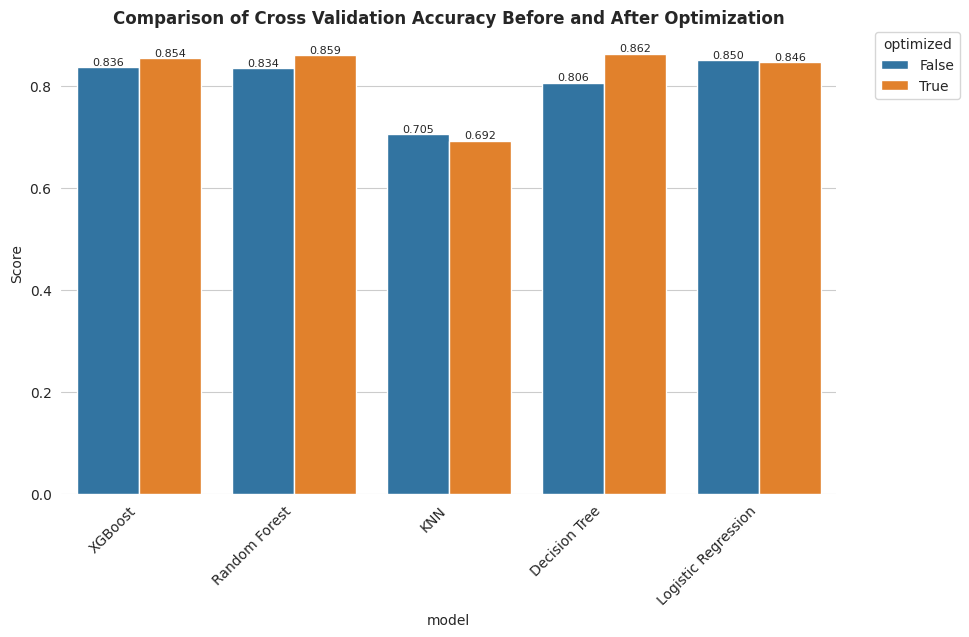

In [33]:
# Create the bar plot

sns.set_style("whitegrid")

fig, ax = plt.subplots(figsize=(10, 6))

sns.barplot(x="model", y="score", hue="optimized", data=models, ax=ax)

sns.despine(left=True, bottom=True)

ax.set_ylabel("Score")

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

ax.legend(title="optimized", bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


# Add the title in bold font

plt.title("Comparison of Cross Validation Accuracy Before and After Optimization", fontweight='bold')


# Add the scores to each bar

for p in ax.patches:

    ax.annotate(f"{p.get_height():.3f}", (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom', fontsize=8)


plt.show()

# **So It turns out that Decision Tree is the winner with and without performing Cross Validation**

In [34]:
# Define hyperparameter space for random search

param_grid = {

    'max_depth': [3, 5, 7, 9],

    'min_samples_split': [2, 5, 10],

    'min_samples_leaf': [1, 5, 10],

    'criterion': ['gini', 'entropy']

}


# Perform random search for hyperparameter optimization

random_search = RandomizedSearchCV(dt_model, param_grid, cv=5, scoring='accuracy', n_iter=10, random_state=42)

random_search.fit(X_train, y_train)


# Get the best hyperparameters and the corresponding model

best_params = random_search.best_params_

best_model_dt = random_search.best_estimator_


# Make predictions with the optimized model

y_pred_optimized = best_model_dt.predict(X_test)


# Evaluate the model after optimization

accuracy_after_optimization_dt = accuracy_score(y_test, y_pred_optimized)


print(f"Accuracy after optimization for Decision Tree: {accuracy_after_optimization_dt}")

Accuracy after optimization for Decision Tree: 0.9688995215311005


In [35]:
test = pd.read_csv("/kaggle/input/titanic/test.csv")

In [36]:


submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": y_pred_optimized})

print(submission)

     PassengerId  Survived
0            892         0
1            893         1
2            894         0
3            895         0
4            896         1
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         0

[418 rows x 2 columns]
